# Imports

In [1]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append('..')
from prediction_denoise import prediction, predict
from glob import glob
import numpy as np
import librosa
import IPython.display as ipd
from signal_utils import audio_files_to_numpy, numpy_audio_to_matrix_spectrogram, snr_db, psnr, apply_noise
from data_plot import plot_spectrogram, plot_3_spectograms
import matplotlib.pyplot as plt

# Read data

Read noisy voices to clean them up.

In [2]:
noisy_voices_list = glob('..\\data\\validation\\noisy_voice\\*')
noisy_voices_list = [os.path.basename(voice) for voice in noisy_voices_list]
print(noisy_voices_list)

['karol_birds.wav', 'karol_klawiatura.wav', 'karol_myszka.wav', 'marcin_klawiatura.wav']


# Denoising

In [4]:
for voice in noisy_voices_list:
    predict(audio_input_prediction=voice, audio_output_prediction=f'pred_{voice}')

Loaded model from disk
128
(22, 128, 128)
(22, 128, 128)
8064
63
Loaded model from disk
128
(22, 128, 128)
(22, 128, 128)
8064
63
Loaded model from disk
128
(18, 128, 128)
(18, 128, 128)
8064
63
Loaded model from disk
128
(5, 128, 128)
(5, 128, 128)
8064
63


# Validation

In [5]:
pred_voices_list = glob('..\\data\\validation\\save_prediction\\*')
pred_voices_list = [os.path.basename(voice) for voice in pred_voices_list]
print(pred_voices_list)

['pred_karol_birds.wav', 'pred_karol_klawiatura.wav', 'pred_karol_myszka.wav', 'pred_marcin_klawiatura.wav']


## Real data tests

### Marcins voice with keyboard

In [6]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[3]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[3]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


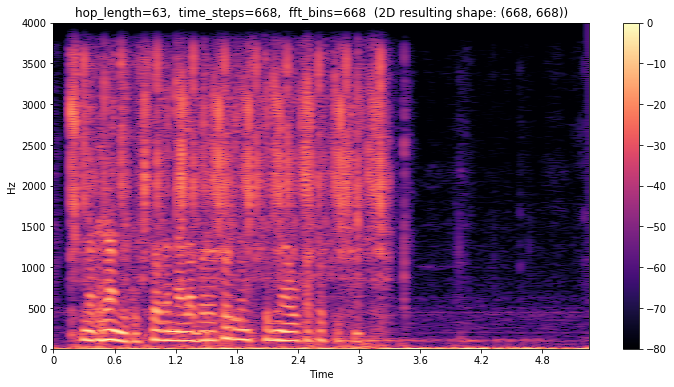

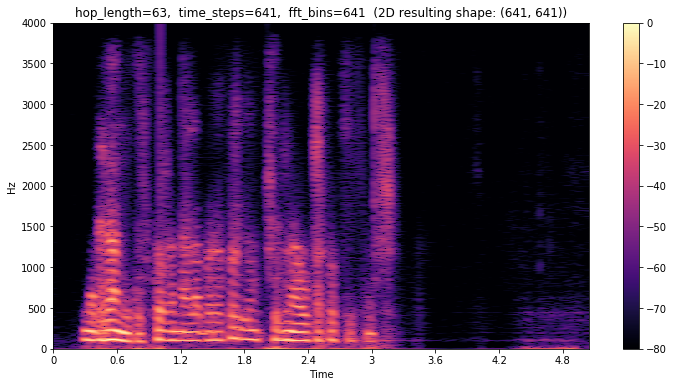

In [7]:
numerator = (real_noisy.shape[0]//63) * 2
real_noisy_db, real_noisy_pha = numpy_audio_to_matrix_spectrogram(
    real_noisy.reshape(1,real_noisy.shape[0]), int(numerator / 2) + 1, numerator + 1, 63
)
numerator = (real_pred.shape[0]//63) * 2
real_pred_db, real_pred_pha = numpy_audio_to_matrix_spectrogram(
    real_pred.reshape(1,real_pred.shape[0]), int(numerator / 2) + 1, numerator, 63
)

plot_spectrogram(
    real_noisy_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

plot_spectrogram(
    real_pred_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

### Karols voice with keyboard

In [8]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[1]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[1]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


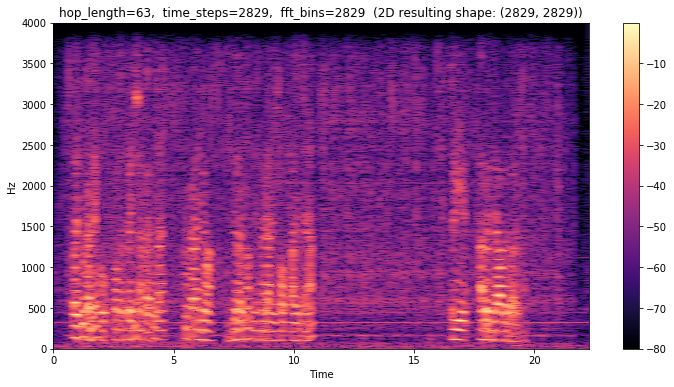

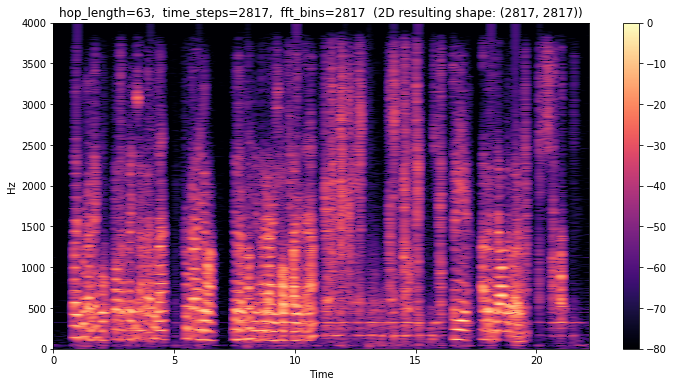

In [9]:
numerator = (real_noisy.shape[0]//63) * 2
real_noisy_db, real_noisy_pha = numpy_audio_to_matrix_spectrogram(
    real_noisy.reshape(1,real_noisy.shape[0]), int(numerator / 2) + 1, numerator + 1, 63
)
numerator = (real_pred.shape[0]//63) * 2
real_pred_db, real_pred_pha = numpy_audio_to_matrix_spectrogram(
    real_pred.reshape(1,real_pred.shape[0]), int(numerator / 2) + 1, numerator, 63
)

plot_spectrogram(
    real_noisy_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

plot_spectrogram(
    real_pred_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

### Karols voice with mouse clicks

In [10]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[2]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[2]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


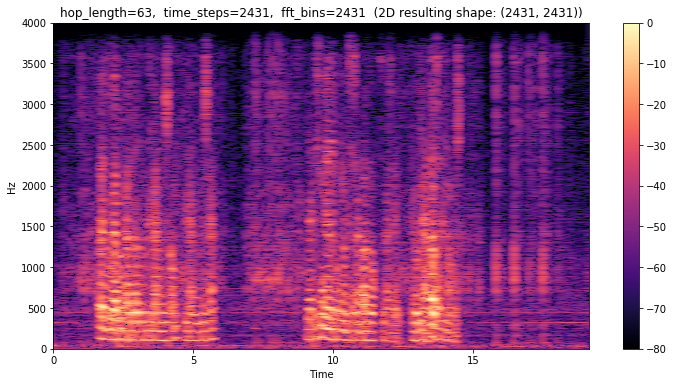

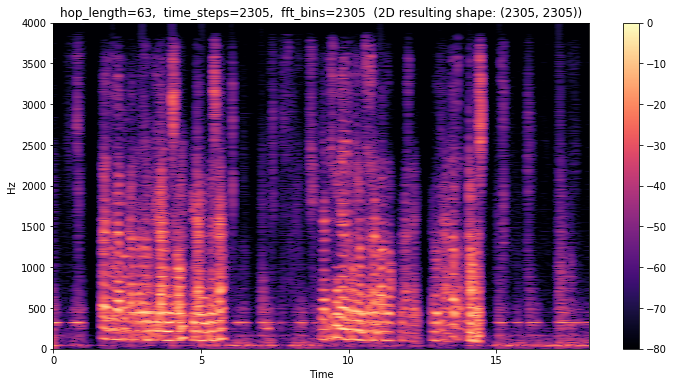

In [11]:
numerator = (real_noisy.shape[0]//63) * 2
real_noisy_db, real_noisy_pha = numpy_audio_to_matrix_spectrogram(
    real_noisy.reshape(1,real_noisy.shape[0]), int(numerator / 2) + 1, numerator + 1, 63
)
numerator = (real_pred.shape[0]//63) * 2
real_pred_db, real_pred_pha = numpy_audio_to_matrix_spectrogram(
    real_pred.reshape(1,real_pred.shape[0]), int(numerator / 2) + 1, numerator, 63
)

plot_spectrogram(
    real_noisy_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

plot_spectrogram(
    real_pred_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

### Karols voice with birds

In [12]:
real_noisy, sr = librosa.load(os.path.join('..\\data\\validation\\noisy_voice',noisy_voices_list[0]), sr=8000)
real_pred, sr = librosa.load(os.path.join('..\\data\\validation\\save_prediction',pred_voices_list[0]), sr=8000)
print('Noisy voice')
ipd.display(ipd.Audio(real_noisy, rate=8000))
print('Predicted voice')
ipd.display(ipd.Audio(real_pred, rate=8000))

Noisy voice


Predicted voice


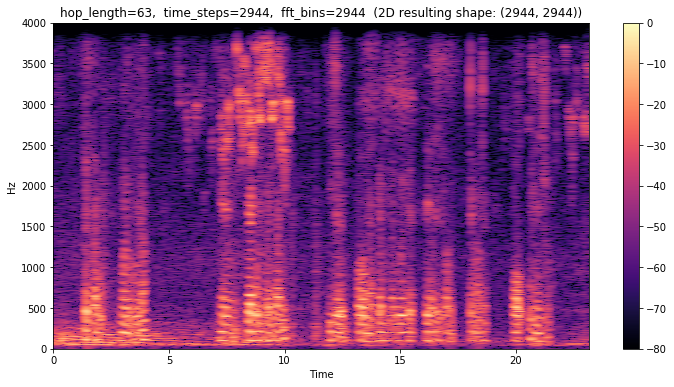

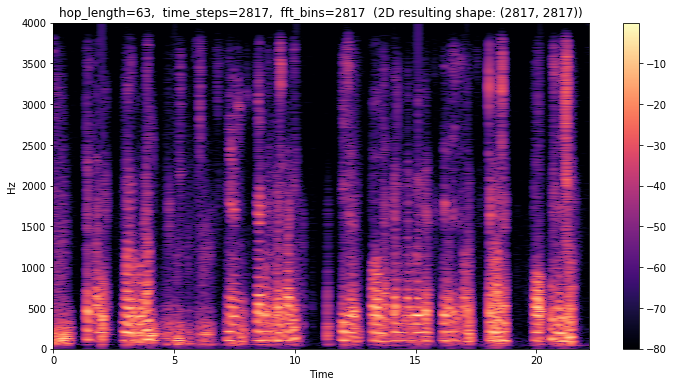

In [13]:
numerator = (real_noisy.shape[0]//63) * 2
real_noisy_db, real_noisy_pha = numpy_audio_to_matrix_spectrogram(
    real_noisy.reshape(1,real_noisy.shape[0]), int(numerator / 2) + 1, numerator + 1, 63
)
numerator = (real_pred.shape[0]//63) * 2
real_pred_db, real_pred_pha = numpy_audio_to_matrix_spectrogram(
    real_pred.reshape(1,real_pred.shape[0]), int(numerator / 2) + 1, numerator, 63
)

plot_spectrogram(
    real_noisy_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)

plot_spectrogram(
    real_pred_db[0,:,:],
    sr,  # sample rate
    63,  # hop_length_fft
)